In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [3]:
def System(r,t,mu=1.5):
    
    x,vx = r
    
    dxdt = vx
    dvxdt = mu*(1-x**2)*vx - x
    
    return [dxdt,dvxdt]

In [41]:
t = np.linspace(0,20,10000)
r0 = [0.5,0.]

In [42]:
sol = odeint(System, r0, t, args=(1.3,))

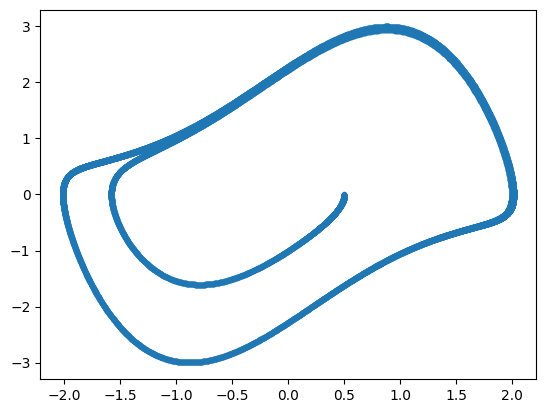

In [43]:
plt.scatter(sol[:,0],sol[:,1],marker='.')

In [44]:
def IntegratorAdams(f,r0,t,mu):
    
    h = t[1] - t[0]
    print(h)
    
    x = np.zeros_like(t)
    vx = np.zeros_like(t)
    
    x[0] = r0[0]
    vx[0] = r0[1]
    
    K11 = np.zeros(2)
    K12 = np.zeros(2)
    
    present = np.array([x[0],vx[0]])
    K11 = f(present,t[0],mu)
    
    # Euler
    x[1] = x[0] + h*K11[0]
    vx[1] = vx[0] + h*K11[1]
    
    xc = x.copy()
    vxc = vx.copy()
    
    for i in range(2,len(t)):
        
        present = np.array([x[i-1],vx[i-1]])
        past = np.array([x[i-2],vx[i-2]])
        
        K11 = f(present,t[i-1],mu)
        K12 = f(past,t[i-2],mu)
        
        x[i] = x[i-1] + 0.5*h*(3*K11[0]-K12[0])
        vx[i] = vx[i-1] + 0.5*h*(3*K11[1]-K12[1])
        
        xc[i] = x[i]
        vxc[i] = vx[i]
        
        # Futuro
        futuro = np.array([x[i],vx[i]])
        K13 = f(futuro,t[i],mu)
        
        xc[i] = xc[i-1] + h*(5*K13[0]+8*K11[0]-K12[0])/12
        vxc[i] = vxc[i-1] + h*(5*K13[1]+8*K11[1]-K12[1])/12
    
    return x,vx,xc,vxc

In [45]:
sol2 = IntegratorAdams(System,r0,t,1.3)

0.002000200020002


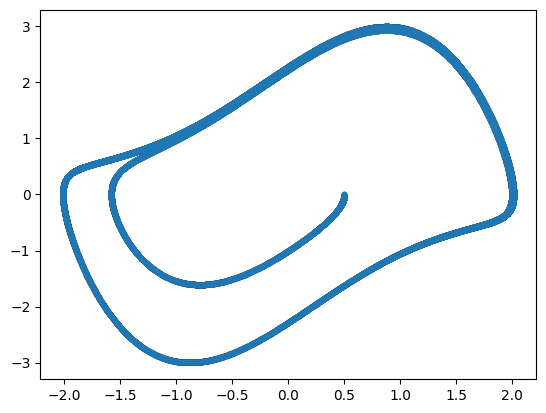

In [46]:
#plt.scatter(sol2[0],sol2[1],color='r')
plt.scatter(sol2[2],sol2[3],marker='.',color='k')
plt.scatter(sol[:,0],sol[:,1],marker='.')

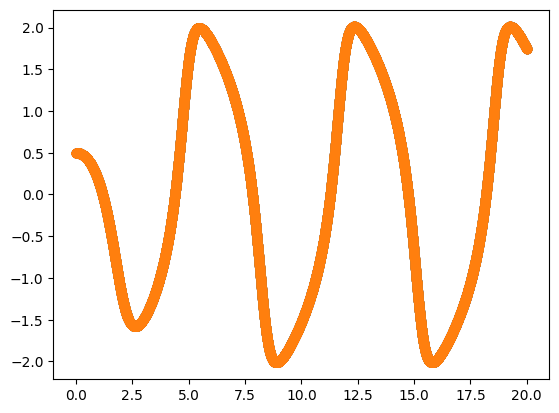

In [47]:
plt.scatter(t,sol[:,0])
plt.scatter(t,sol2[2])

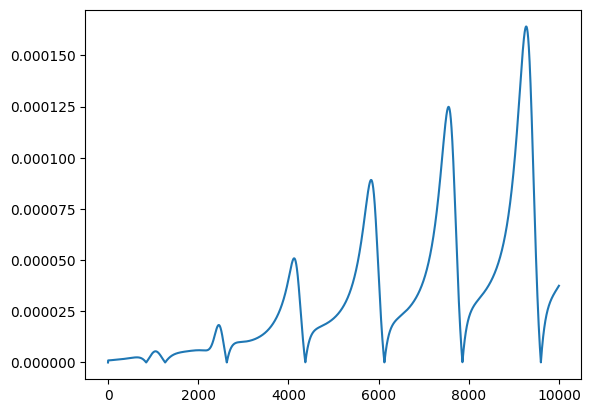

In [49]:
plt.plot(np.abs(sol2[2]-sol[:,0]))